## **Import Dependencies**

In [166]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [167]:
import pandas as pd
import os
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

## **Read the Datasets**

In [168]:
data_gdf = gpd.read_file(r"/content/drive/MyDrive/Harish's Dissertation/Bihar Project Work/Vulnerability_Datasets/Bihar_Socio_Economic_Data.shp")
data_gdf['CD Block_C'] = data_gdf['CD Block_C'].astype(int)
data_gdf = data_gdf[['CD Block_C', 'Name', 'geometry']]
print(data_gdf.shape)
data_gdf.head()

(534, 3)


,CD Block_C,Name,geometry
0,1,Sidhaw,"POLYGON ((83.93559 27.44939, 83.93692 27.44809..."
1,2,Ramnagar,"POLYGON ((84.10851 27.52135, 84.10899 27.52069..."
2,3,Gaunaha,"POLYGON ((84.38077 27.37496, 84.38372 27.37355..."
3,4,Mainatanr,"POLYGON ((84.64944 27.29595, 84.65043 27.29426..."
4,5,Narkatiaganj,"POLYGON ((84.39914 27.19447, 84.39944 27.19382..."


In [169]:
# Read the entire socio-economic data for Bihar
data_df = pd.read_csv(r"/content/drive/MyDrive/Harish's Dissertation/Bihar Project Work/Vulnerability_Datasets/Merged_Dist_Level_PCA.csv")
required_columns = [
    'CD Block_Code', 'Name', 'Total Population Person', 'No of Households', 'Total Population Female',
    'Population in the age group 0-6 Person', 'Scheduled Castes population Person', 'Scheduled Tribes population Person',
    'Scheduled Castes population Female', 'Scheduled Tribes population Female', 'Illiterate Persons', 'Illiterate Female',
    'Main Cultivator Population Person', 'Main Agricultural Labourers Population Person', 'Marginal Worker Population Person',
    'Non Working Population Person', 'Literates Population Person', 'Literates Population Female', 'Total Worker Population Person',
    'Total Worker Population Female'
]
data_df = data_df[required_columns]
data_df.rename(columns={'CD Block_Code': 'CD Block_C'}, inplace=True)
print(data_df.shape)
data_df.head()

(534, 20)


,CD Block_C,Name,Total Population Person,No of Households,Total Population Female,Population in the age group 0-6 Person,Scheduled Castes population Person,Scheduled Tribes population Person,Scheduled Castes population Female,Scheduled Tribes population Female,Illiterate Persons,Illiterate Female,Main Cultivator Population Person,Main Agricultural Labourers Population Person,Marginal Worker Population Person,Non Working Population Person,Literates Population Person,Literates Population Female,Total Worker Population Person,Total Worker Population Female
0,423,Simri,621675,91164,295938,102465,67506,17595,31653,8274,267069,157989,30228,39324,95181,424551,354606,137949,197124,52089
1,424,Chakki,126768,17760,61338,21945,12819,3423,6195,1647,55689,34353,9294,5628,8808,97146,71079,26985,29622,4089
2,425,Barhampur,588210,86478,282219,101916,79425,10260,37896,4950,262440,155346,41301,41631,77658,392187,325770,126873,196023,58896
3,426,Chaugain,146229,23787,71166,25701,23433,891,11391,405,62547,37479,13548,10737,26340,89514,83682,33687,56715,19500
4,427,Kesath,101460,15912,49215,18768,17871,456,8670,240,42663,25107,7791,5748,15558,65898,58797,24108,35562,10587


In [170]:
data_df['Total Population Female'] = (data_df['Total Population Female'] / data_df['Total Population Person']) * 100
data_df['Population in the age group 0-6 Person'] = (data_df['Population in the age group 0-6 Person'] / data_df['Total Population Person']) * 100
data_df['Scheduled Castes population Person'] = (data_df['Scheduled Castes population Person'] / data_df['Total Population Person']) * 100
data_df['Scheduled Tribes population Person'] = (data_df['Scheduled Tribes population Person'] / data_df['Total Population Person']) * 100
data_df['Scheduled Castes population Female'] = (data_df['Scheduled Castes population Female'] / data_df['Total Population Person']) * 100
data_df['Scheduled Tribes population Female'] = (data_df['Scheduled Tribes population Female'] / data_df['Total Population Person']) * 100
data_df['Illiterate Persons'] = (data_df['Illiterate Persons'] / data_df['Total Population Person']) * 100
data_df['Illiterate Female'] = (data_df['Illiterate Female'] / data_df['Total Population Person']) * 100
data_df['Main Cultivator Population Person'] = data_df['Main Cultivator Population Person'] / data_df['Total Worker Population Person']
data_df['Main Agricultural Labourers Population Person'] = data_df['Main Agricultural Labourers Population Person'] / data_df['Total Worker Population Person']
data_df['Marginal Worker Population Person'] = data_df['Marginal Worker Population Person'] / data_df['Total Worker Population Person']
data_df['Non Working Population Person'] = (data_df['Non Working Population Person'] / data_df['Total Population Person']) * 100
data_df['Literates Population Person'] = (data_df['Literates Population Person'] / data_df['Total Population Person']) * 100
data_df['Literates Population Female'] = (data_df['Literates Population Female'] / data_df['Total Population Person']) * 100
data_df['Total Worker Population Person'] = (data_df['Total Worker Population Person'] / data_df['Total Population Person']) * 100
data_df['Total Worker Population Female'] = (data_df['Total Worker Population Female'] / data_df['Total Population Person']) * 100
print(data_df.shape)
data_df.head()


(534, 20)


,CD Block_C,Name,Total Population Person,No of Households,Total Population Female,Population in the age group 0-6 Person,Scheduled Castes population Person,Scheduled Tribes population Person,Scheduled Castes population Female,Scheduled Tribes population Female,Illiterate Persons,Illiterate Female,Main Cultivator Population Person,Main Agricultural Labourers Population Person,Marginal Worker Population Person,Non Working Population Person,Literates Population Person,Literates Population Female,Total Worker Population Person,Total Worker Population Female
0,423,Simri,621675,91164,47.603330,16.482085,10.858728,2.830257,5.091567,1.330920,42.959585,25.413439,0.153345,0.199489,0.482848,68.291471,57.040415,22.189890,31.708529,8.378815
1,424,Chakki,126768,17760,48.386028,17.311151,10.112173,2.700208,4.886880,1.299224,43.929856,27.099110,0.313753,0.189994,0.297347,76.632904,56.070144,21.286918,23.367096,3.225577
2,425,Barhampur,588210,86478,47.979293,17.326465,13.502831,1.744275,6.442597,0.841536,44.616719,26.409956,0.210695,0.212378,0.396168,66.674657,55.383281,21.569337,33.325343,10.012751
3,426,Chaugain,146229,23787,48.667501,17.575857,16.024865,0.609318,7.789836,0.276963,42.773321,25.630347,0.238879,0.189315,0.464427,61.214944,57.226679,23.037154,38.785056,13.335248
4,427,Kesath,101460,15912,48.506801,18.497930,17.613838,0.449438,8.545240,0.236546,42.049083,24.745713,0.219082,0.161633,0.437489,64.949734,57.950917,23.761088,35.050266,10.434654


In [171]:
# Merge both the data
data_gdf = pd.merge(left=data_gdf, right=data_df, on=['CD Block_C', 'Name'], how='left')
print(data_gdf.shape)
data_gdf.head()

(534, 21)


,CD Block_C,Name,geometry,Total Population Person,No of Households,Total Population Female,Population in the age group 0-6 Person,Scheduled Castes population Person,Scheduled Tribes population Person,Scheduled Castes population Female,...,Illiterate Persons,Illiterate Female,Main Cultivator Population Person,Main Agricultural Labourers Population Person,Marginal Worker Population Person,Non Working Population Person,Literates Population Person,Literates Population Female,Total Worker Population Person,Total Worker Population Female
0,1,Sidhaw,"POLYGON ((83.93559 27.44939, 83.93692 27.44809...",929622.0,166308.0,48.292855,18.515267,16.188515,32.297966,7.794458,...,57.655047,32.139192,0.107878,0.457884,0.372279,51.550630,42.344953,16.153662,48.449370,20.628384
1,2,Ramnagar,"POLYGON ((84.10851 27.52135, 84.10899 27.52069...",602073.0,110739.0,48.169574,19.710899,18.828946,19.097020,9.024819,...,57.694665,32.203736,0.107072,0.429331,0.383788,58.949828,42.305335,15.965838,41.050172,14.812822
2,3,Gaunaha,"POLYGON ((84.38077 27.37496, 84.38372 27.37355...",624507.0,111867.0,47.966316,20.003459,17.028952,30.541051,8.128011,...,52.881073,29.894941,0.111435,0.401079,0.422206,58.525525,47.118927,18.071375,41.474475,15.350989
3,4,Mainatanr,"POLYGON ((84.64944 27.29595, 84.65043 27.29426...",572232.0,103047.0,47.787086,22.203058,15.257099,6.037936,7.295642,...,57.660529,32.053433,0.101043,0.370413,0.450061,57.729208,42.339471,15.733653,42.270792,16.364866
4,5,Narkatiaganj,"POLYGON ((84.39914 27.19447, 84.39944 27.19382...",985005.0,179496.0,47.840468,21.328826,15.827432,2.004964,7.622398,...,57.595444,32.112933,0.101991,0.266654,0.548973,63.935615,42.404556,15.727534,36.064385,11.078624


In [172]:
# Filter the NaN rows
data_gdf_nan = data_gdf[data_gdf.isna().any(axis=1)].iloc[:, :3]
data_gdf = data_gdf.dropna()
data_gdf_nan = gpd.sjoin_nearest(left_df=data_gdf_nan, right_df=data_gdf.drop(columns=['CD Block_C', 'Name']), how='left')
data_gdf_nan = data_gdf_nan.drop_duplicates(subset=['CD Block_C', 'Name'])[data_gdf.columns]
data_gdf = pd.concat((data_gdf, data_gdf_nan), axis=0)
print(data_gdf.shape)
data_gdf.head()

(534, 21)


,CD Block_C,Name,geometry,Total Population Person,No of Households,Total Population Female,Population in the age group 0-6 Person,Scheduled Castes population Person,Scheduled Tribes population Person,Scheduled Castes population Female,...,Illiterate Persons,Illiterate Female,Main Cultivator Population Person,Main Agricultural Labourers Population Person,Marginal Worker Population Person,Non Working Population Person,Literates Population Person,Literates Population Female,Total Worker Population Person,Total Worker Population Female
0,1,Sidhaw,"POLYGON ((83.93559 27.44939, 83.93692 27.44809...",929622.0,166308.0,48.292855,18.515267,16.188515,32.297966,7.794458,...,57.655047,32.139192,0.107878,0.457884,0.372279,51.550630,42.344953,16.153662,48.449370,20.628384
1,2,Ramnagar,"POLYGON ((84.10851 27.52135, 84.10899 27.52069...",602073.0,110739.0,48.169574,19.710899,18.828946,19.097020,9.024819,...,57.694665,32.203736,0.107072,0.429331,0.383788,58.949828,42.305335,15.965838,41.050172,14.812822
2,3,Gaunaha,"POLYGON ((84.38077 27.37496, 84.38372 27.37355...",624507.0,111867.0,47.966316,20.003459,17.028952,30.541051,8.128011,...,52.881073,29.894941,0.111435,0.401079,0.422206,58.525525,47.118927,18.071375,41.474475,15.350989
3,4,Mainatanr,"POLYGON ((84.64944 27.29595, 84.65043 27.29426...",572232.0,103047.0,47.787086,22.203058,15.257099,6.037936,7.295642,...,57.660529,32.053433,0.101043,0.370413,0.450061,57.729208,42.339471,15.733653,42.270792,16.364866
4,5,Narkatiaganj,"POLYGON ((84.39914 27.19447, 84.39944 27.19382...",985005.0,179496.0,47.840468,21.328826,15.827432,2.004964,7.622398,...,57.595444,32.112933,0.101991,0.266654,0.548973,63.935615,42.404556,15.727534,36.064385,11.078624


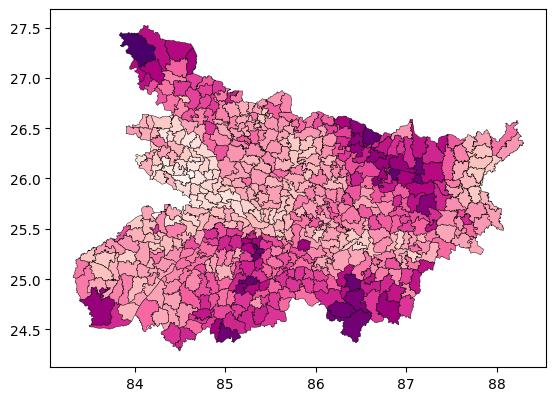

In [173]:
data_gdf.plot(column='Total Worker Population Person', edgecolor='k', linewidth=0.3, cmap='RdPu');

## **Pearson Correlation Analysis**

In [174]:
def get_highly_correlated_columns(df, threshold=0.9, method='pearson'):
    """
    Identify column names in a DataFrame that are highly correlated above a given threshold.

    Parameters:
    - df (pd.DataFrame): The input DataFrame with numeric columns.
    - threshold (float): Correlation threshold (0 < threshold <= 1). Default is 0.9.
    - method (str): Correlation method: 'pearson', 'kendall', or 'spearman'. Default is 'pearson'.

    Returns:
    - correlated_columns (set): Set of column names that are involved in at least one high correlation pair.
    """

    if not 0 < threshold <= 1:
        raise ValueError("Threshold must be between 0 and 1.")

    # Compute the correlation matrix
    corr_matrix = df.corr(method=method)

    # Create a set to store correlated column names
    correlated_columns = set()

    # Check upper triangle only
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                correlated_columns.add(corr_matrix.columns[i])
                correlated_columns.add(corr_matrix.columns[j])

    return correlated_columns

In [175]:
# Divide the data into inputs and output
inputs = [
    'Total Population Person',
    'Total Population Female',
    'No of Households',
    'Population in the age group 0-6 Person',
    'Scheduled Castes population Person',
    'Scheduled Castes population Female',
    'Scheduled Tribes population Person',
    'Scheduled Tribes population Female',
    'Illiterate Persons',
    'Illiterate Female',
    'Main Cultivator Population Person',
    'Main Agricultural Labourers Population Person',
    'Marginal Worker Population Person',
    'Non Working Population Person'
]

outputs = [
    'Literates Population Person',
    'Literates Population Female',
    'Total Worker Population Person',
    'Total Worker Population Female'
]

data_df_inputs = data_df[['CD Block_C', 'Name'] + inputs]
data_df_outputs = data_df[['CD Block_C', 'Name'] + outputs]
print(data_df_inputs.shape, data_df_outputs.shape)

(534, 16) (534, 6)


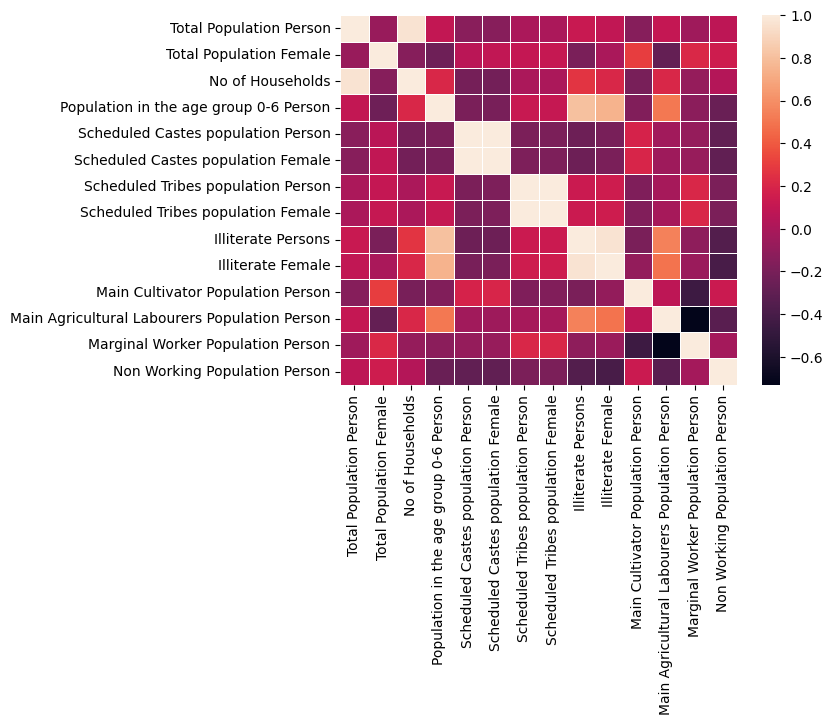

In [176]:
sns.heatmap(data_df_inputs.iloc[:, 2:].corr(), edgecolor='k', linewidth=0.5);

In [177]:
# Find the highly correlated columns
correlated_cols_input = get_highly_correlated_columns(data_df_inputs.iloc[:, 2:], threshold=0.9)
correlated_cols_output = get_highly_correlated_columns(data_df_outputs.iloc[:, 2:], threshold=0.9)
print('Length of correlated input columns:', len(correlated_cols_input))
print('Length of correlated output columns:', len(correlated_cols_output))

Length of correlated input columns: 8
Length of correlated output columns: 4


In [178]:
# Split the correlated and uncorrelated features
uncorrelated_cols = set(data_df_inputs.columns[2:]).difference(correlated_cols_input)
data_df_inputs_corr = data_df_inputs[['CD Block_C', 'Name'] + list(correlated_cols_input)]
data_df_inputs_non_corr = data_df_inputs[['CD Block_C', 'Name'] + list(uncorrelated_cols)]

print(data_df_inputs_corr.shape, data_df_inputs_non_corr.shape)

(534, 10) (534, 8)


## **Apply PCA on Correlated Variables**

In [179]:
def pca_until_variance(df, variance_threshold=0.90):
    """
    Perform PCA on a DataFrame and return the transformed features
    needed to reach the specified cumulative explained variance.

    Parameters:
    - df (pd.DataFrame): DataFrame with numeric features.
    - variance_threshold (float): Desired cumulative explained variance (0 < threshold <= 1).

    Returns:
    - pca_features (pd.DataFrame): Transformed PCA features up to desired variance.
    - n_components (int): Number of components used.
    """
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)

    # Fit PCA
    pca = PCA()
    pca.fit(scaled_data)

    # Calculate cumulative explained variance
    cum_var = pca.explained_variance_ratio_.cumsum()

    # Find number of components to reach the threshold
    n_components = (cum_var < variance_threshold).sum() + 1

    # Apply PCA with the selected number of components
    pca_final = PCA(n_components=n_components)
    pca_features = pca_final.fit_transform(scaled_data)

    # Return as DataFrame
    pca_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(n_components)])

    return pca_df, n_components

def plot_explained_variance(df):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)

    pca = PCA()
    pca.fit(scaled_data)

    explained_var = pca.explained_variance_ratio_
    cum_var = explained_var.cumsum()

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(explained_var) + 1), cum_var, marker='o', linestyle='--')
    plt.title('Cumulative Explained Variance by PCA Components')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)
    plt.axhline(y=0.90, color='r', linestyle='--', label='90% threshold')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [180]:
# Apply PCA on correlated dataset
data_df_inputs_corr_pca, n_components = pca_until_variance(data_df_inputs_corr.iloc[:, 2:], variance_threshold=0.90)
print(data_df_inputs_corr_pca.shape)
data_df_inputs_corr_pca.head()

(534, 4)


,PC1,PC2,PC3,PC4
0,-0.207522,0.406247,-2.045937,-0.679135
1,0.604692,2.162617,-0.615387,-2.119615
2,0.151536,0.186830,-1.349639,-0.502335
3,1.865903,1.474225,-0.437779,-1.500512
4,2.351092,1.625801,-0.441528,-1.422388


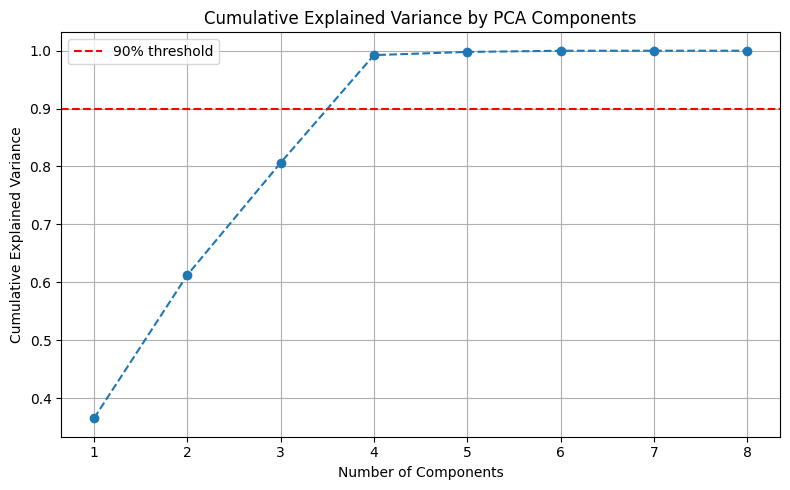

In [181]:
plot_explained_variance(data_df_inputs_corr.iloc[:, 2:])

In [182]:
# Apply Min-Max Normalization
scaler = MinMaxScaler()
data_df_inputs_corr_pca_scaled = scaler.fit_transform(data_df_inputs_corr_pca)
data_df_inputs_corr_pca_scaled = pd.DataFrame(data_df_inputs_corr_pca_scaled, columns=data_df_inputs_corr_pca.columns)
print(data_df_inputs_corr_pca_scaled.shape)
data_df_inputs_corr_pca_scaled.head()

(534, 4)


,PC1,PC2,PC3,PC4
0,0.660850,0.209675,0.114012,0.232211
1,0.731491,0.303982,0.322371,0.092730
2,0.692078,0.197894,0.215428,0.249331
3,0.841182,0.267019,0.348239,0.152677
4,0.883381,0.275158,0.347693,0.160242


In [183]:
# Merge the dataframes
scaler = MinMaxScaler()
data_df_inputs_non_corr_scaled = scaler.fit_transform(data_df_inputs_non_corr.iloc[:, 2:])
data_df_inputs_non_corr_scaled = pd.DataFrame(data_df_inputs_non_corr_scaled, columns=data_df_inputs_non_corr.columns[2:])

final_inputs_df = pd.concat((data_df_inputs.iloc[:, :2], data_df_inputs_non_corr_scaled, data_df_inputs_corr_pca_scaled), axis=1)
print(final_inputs_df.shape)
final_inputs_df.head()

(534, 12)


,CD Block_C,Name,Marginal Worker Population Person,Non Working Population Person,Population in the age group 0-6 Person,Total Population Female,Main Cultivator Population Person,Main Agricultural Labourers Population Person,PC1,PC2,PC3,PC4
0,423,Simri,0.568012,0.644296,0.123217,0.201203,0.370772,0.275790,0.660850,0.209675,0.114012,0.232211
1,424,Chakki,0.244145,0.965328,0.229766,0.324020,0.964384,0.255536,0.731491,0.303982,0.322371,0.092730
2,425,Barhampur,0.416677,0.582070,0.231734,0.260197,0.583002,0.303287,0.692078,0.197894,0.215428,0.249331
3,426,Chaugain,0.535851,0.371945,0.263786,0.368188,0.687301,0.254087,0.841182,0.267019,0.348239,0.152677
4,427,Kesath,0.488820,0.515684,0.382288,0.342971,0.614041,0.195035,0.883381,0.275158,0.347693,0.160242


In [184]:
scaler = MinMaxScaler()
data_df_outputs_scaled = scaler.fit_transform(data_df_outputs.iloc[:, 2:])
data_df_outputs_scaled = pd.DataFrame(data_df_outputs_scaled, columns=data_df_outputs.columns[2:])
data_df_outputs_scaled = pd.concat((data_df_outputs.iloc[:, :2], data_df_outputs_scaled), axis=1)
print(data_df_outputs_scaled.shape)
data_df_outputs_scaled.head()

(534, 6)


,CD Block_C,Name,Literates Population Person,Literates Population Female,Total Worker Population Person,Total Worker Population Female
0,423,Simri,0.799570,0.758907,0.355704,0.306544
1,424,Chakki,0.768533,0.700799,0.034672,0.024268
2,425,Barhampur,0.746562,0.718973,0.417930,0.396044
3,426,Chaugain,0.805528,0.813431,0.628055,0.578039
4,427,Kesath,0.828695,0.860018,0.484316,0.419155


## **CCR DEA Model Implementation**

In [185]:
# Install Pulp
!pip install pulp
from pulp import LpProblem, LpMaximize, LpVariable, lpSum, LpStatus, value

In [186]:
def ccr_dea(inputs, outputs):
    n_dmus, n_inputs = inputs.shape
    _, n_outputs = outputs.shape
    efficiencies = []

    for dmu in range(n_dmus):
        # LP model
        model = LpProblem(f"CCR_DEA_DM{dmu}", LpMaximize)

        # Define variables
        u = [LpVariable(f"u_{r}", lowBound=0) for r in range(n_outputs)]
        v = [LpVariable(f"v_{i}", lowBound=0) for i in range(n_inputs)]

        # Objective: Maximize efficiency of DMU dmu
        model += lpSum([u[r] * outputs[dmu, r] for r in range(n_outputs)])

        # Constraint: Denominator of objective is fixed at 1
        model += lpSum([v[i] * inputs[dmu, i] for i in range(n_inputs)]) == 1

        # Constraints: efficiency ≤ 1 for all DMUs
        for j in range(n_dmus):
            model += lpSum([u[r] * outputs[j, r] for r in range(n_outputs)]) <= \
                     lpSum([v[i] * inputs[j, i] for i in range(n_inputs)])

        # Solve the model
        model.solve()

        # Get efficiency score
        if LpStatus[model.status] == 'Optimal':
            eff = value(model.objective)
        else:
            eff = None
        efficiencies.append(eff)

    return efficiencies


In [187]:
efficiency_score = ccr_dea(final_inputs_df.iloc[:, 2:].values, data_df_outputs_scaled.iloc[:, 2:].values)

In [188]:
efficiency_score_gdf = final_inputs_df[['CD Block_C', 'Name']]
efficiency_score_gdf['Technical_Efficiency'] = efficiency_score
efficiency_score_gdf = pd.merge(left=efficiency_score_gdf, right=data_gdf[['CD Block_C', 'Name', 'geometry']],
                                on=['CD Block_C', 'Name'], how='left')
efficiency_score_gdf = gpd.GeoDataFrame(efficiency_score_gdf)
print(efficiency_score_gdf.shape)
efficiency_score_gdf.head()

(534, 4)


,CD Block_C,Name,Technical_Efficiency,geometry
0,423,Simri,1.000000,"POLYGON ((84.13986 25.73172, 84.1406 25.73101,..."
1,424,Chakki,1.000000,"MULTIPOLYGON (((84.30144 25.65943, 84.30192 25..."
2,425,Barhampur,0.934074,"POLYGON ((84.38542 25.74655, 84.38593 25.74617..."
3,426,Chaugain,1.000000,"POLYGON ((84.2476 25.54629, 84.24757 25.54401,..."
4,427,Kesath,1.000000,None


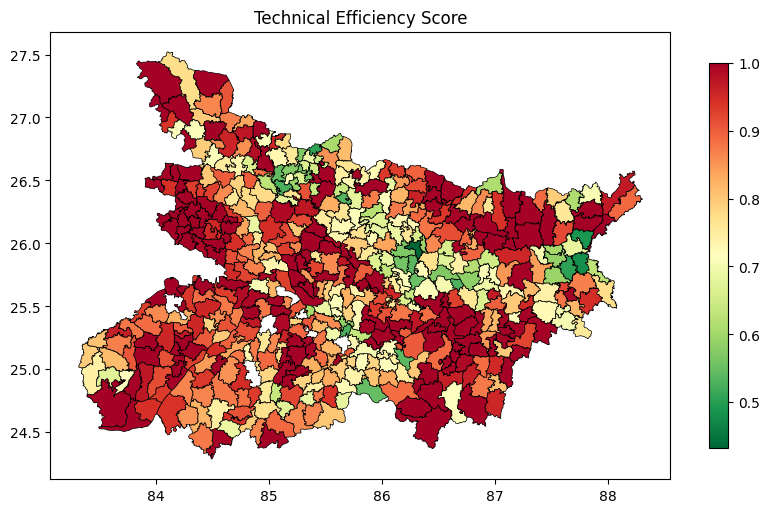

In [191]:
efficiency_score_gdf.plot(column='Technical_Efficiency', linewidth=0.5, edgecolor='k', legend=True, legend_kwds={'shrink': 0.5},
                          cmap='RdYlGn_r', figsize=(10, 10))
plt.title('Technical Efficiency Score');

## **Read the Susceptibility Values**

In [192]:
RF_susceptibility_df = pd.read_csv(r"/content/drive/MyDrive/Harish's Dissertation/Bihar Project Work/Vulnerability_Datasets/Bihar_Vulnerability_With_RF.csv")
RF_susceptibility_df = RF_susceptibility_df[['CD Block_C', 'Name', 'RF_Susceptibility']].rename(columns={'RF_Susceptibility': 'RF_Susceptibility'})
XGB_susceptibility_df = pd.read_csv(r"/content/drive/MyDrive/Harish's Dissertation/Bihar Project Work/Vulnerability_Datasets/Bihar_Vulnerability_With_XGB.csv")
XGB_susceptibility_df = XGB_susceptibility_df[['CD Block_C', 'Name', 'XGB_Susceptibility']].rename(columns={'XGB_Susceptibility': 'XGB_Susceptibility'})

final_susceptibility_df = pd.merge(left=RF_susceptibility_df, right=XGB_susceptibility_df, on=['CD Block_C', 'Name'], how='inner')
print(final_susceptibility_df.shape)
final_susceptibility_df.head()

(542, 4)


,CD Block_C,Name,RF_Susceptibility,XGB_Susceptibility
0,47.0,Piprarhi,0.620657,0.654564
1,48.0,Sheohar,0.678055,0.663495
2,41.0,Patahi,0.549872,0.606791
3,22.0,Sugauli,0.282859,0.424294
4,63.0,Bajpatti,0.717201,0.684326


## **Calculate the Flood Risk Scores**

In [193]:
vulnerability_gdf = pd.merge(left=efficiency_score_gdf, right=final_susceptibility_df, on=['CD Block_C', 'Name'], how='left')
vulnerability_gdf['SEV'] = 1 - vulnerability_gdf['Technical_Efficiency']

vulnerability_gdf['RF_Flood_Risk'] = vulnerability_gdf['RF_Susceptibility'] * vulnerability_gdf['SEV']
vulnerability_gdf['XGB_Flood_Risk'] = vulnerability_gdf['XGB_Susceptibility'] * vulnerability_gdf['SEV']
vulnerability_gdf['RF_Flood_Risk_Index'] = (vulnerability_gdf['RF_Flood_Risk'] - vulnerability_gdf['RF_Flood_Risk'].min()) / (vulnerability_gdf['RF_Flood_Risk'].max() - vulnerability_gdf['RF_Flood_Risk'].min())
vulnerability_gdf['XGB_Flood_Risk_Index'] = (vulnerability_gdf['XGB_Flood_Risk'] - vulnerability_gdf['XGB_Flood_Risk'].min()) / (vulnerability_gdf['XGB_Flood_Risk'].max() - vulnerability_gdf['XGB_Flood_Risk'].min())

print(vulnerability_gdf.shape)
vulnerability_gdf.head()

(534, 11)


,CD Block_C,Name,Technical_Efficiency,geometry,RF_Susceptibility,XGB_Susceptibility,SEV,RF_Flood_Risk,XGB_Flood_Risk,RF_Flood_Risk_Index,XGB_Flood_Risk_Index
0,423,Simri,1.000000,"POLYGON ((84.13986 25.73172, 84.1406 25.73101,...",0.593991,0.522549,-3.845878e-08,-2.284417e-08,-2.009660e-08,4.063301e-09,1.093804e-08
1,424,Chakki,1.000000,"MULTIPOLYGON (((84.30144 25.65943, 84.30192 25...",0.574012,0.525299,8.376316e-09,4.808109e-09,4.400072e-09,6.227219e-08,5.628151e-08
2,425,Barhampur,0.934074,"POLYGON ((84.38542 25.74655, 84.38593 25.74617...",0.428182,0.367483,6.592631e-02,2.822846e-02,2.422680e-02,5.942181e-02,4.484399e-02
3,426,Chaugain,1.000000,"POLYGON ((84.2476 25.54629, 84.24757 25.54401,...",0.127549,0.093331,-4.289912e-09,-5.471722e-10,-4.003837e-10,5.099916e-08,4.739584e-08
4,427,Kesath,1.000000,None,NaN,NaN,-1.036674e-09,NaN,NaN,NaN,NaN


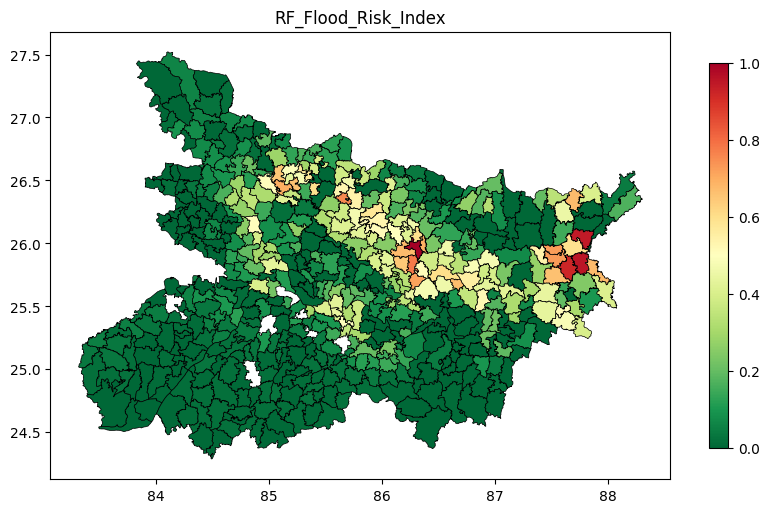

In [194]:
vulnerability_gdf.plot(column='RF_Flood_Risk_Index', linewidth=0.5, edgecolor='k', legend=True, legend_kwds={'shrink': 0.5},
                       cmap='RdYlGn_r', figsize=(10, 10))
plt.title('RF_Flood_Risk_Index');

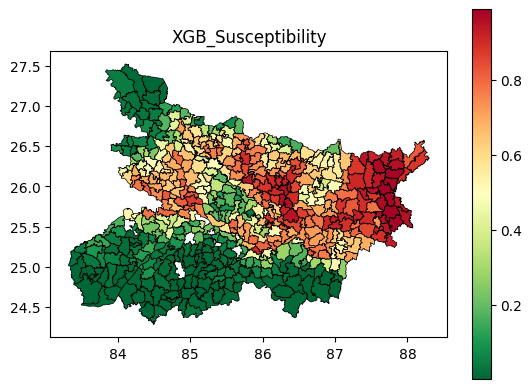

In [195]:
vulnerability_gdf.plot(column='XGB_Susceptibility', linewidth=0.5, edgecolor='k', legend=True,
                       cmap='RdYlGn_r')
plt.title('XGB_Susceptibility');

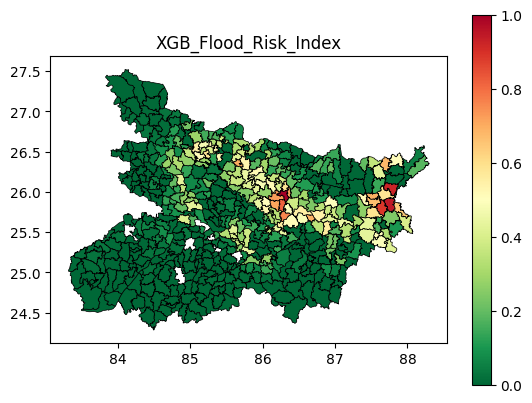

In [196]:
vulnerability_gdf.plot(column='XGB_Flood_Risk_Index', linewidth=0.5, edgecolor='k', legend=True,
                       cmap='RdYlGn_r')
plt.title('XGB_Flood_Risk_Index');

In [109]:
# vulnerability_gdf.to_file("/content/drive/MyDrive/Harish's Dissertation/Bihar Project Work/Vulnerability_Datasets/Risk_Score/Risk_Score.shp")

In [199]:
data_gdf_nan

,CD Block_C,Name,geometry,Total Population Person,No of Households,Total Population Female,Population in the age group 0-6 Person,Scheduled Castes population Person,Scheduled Tribes population Person,Scheduled Castes population Female,...,Illiterate Persons,Illiterate Female,Main Cultivator Population Person,Main Agricultural Labourers Population Person,Marginal Worker Population Person,Non Working Population Person,Literates Population Person,Literates Population Female,Total Worker Population Person,Total Worker Population Female
526,361,Asthawan,"POLYGON ((85.68759 25.28839, 85.68831 25.2885,...",202443.0,32832.0,47.853470,17.561980,21.717224,0.084468,10.410338,...,42.250411,23.670366,0.170099,0.308969,0.369747,62.939198,57.749589,24.183103,37.060802,12.298277
527,377,Tharthari,"MULTIPOLYGON (((85.38996 25.24269, 85.39143 25...",210948.0,33945.0,47.826953,16.962000,13.803402,0.052620,6.678423,...,41.694636,24.883384,0.179922,0.328875,0.341350,54.171170,58.305364,22.943569,45.828830,17.983105
528,390,Patna Rural,"POLYGON ((85.10274 25.66161, 85.10504 25.65997...",574167.0,100686.0,47.365836,17.143096,23.055139,0.115994,11.065422,...,40.270862,22.786576,0.123088,0.197253,0.336795,70.213544,59.729138,24.579260,29.786456,5.652362
529,397,Masaurhi,"POLYGON ((85.01335 25.43786, 85.01374 25.43636...",634128.0,109908.0,48.251457,18.459522,22.952464,0.045890,11.111479,...,50.489176,29.439009,0.231186,0.383996,0.272299,60.300602,49.510824,18.812448,39.699398,13.362444
530,397,Daniawan,"POLYGON ((85.30535 25.48331, 85.30613 25.4828,...",634128.0,109908.0,48.251457,18.459522,22.952464,0.045890,11.111479,...,50.489176,29.439009,0.231186,0.383996,0.272299,60.300602,49.510824,18.812448,39.699398,13.362444
531,433,Kesath,"POLYGON ((84.20831 25.46203, 84.21025 25.46065...",499602.0,76671.0,48.745601,18.485114,14.587412,0.249799,7.099451,...,45.739008,27.349370,0.214925,0.187079,0.471558,70.284146,54.260992,21.396231,29.715854,6.692327
532,433,Dumraon,"POLYGON ((84.09311 25.60602, 84.0938 25.6048, ...",499602.0,76671.0,48.745601,18.485114,14.587412,0.249799,7.099451,...,45.739008,27.349370,0.214925,0.187079,0.471558,70.284146,54.260992,21.396231,29.715854,6.692327
533,484,Tikari,"POLYGON ((84.81635 25.07201, 84.8166 25.07127,...",305907.0,49647.0,48.247997,18.122174,33.924036,0.010788,16.360855,...,46.386647,26.982710,0.263669,0.345215,0.243055,63.464386,53.613353,21.265287,36.535614,12.070335


In [200]:
# Filter the NaN rows
data_gdf_nan = data_gdf_nan[['CD Block_C', 'Name', 'geometry']]
data_gdf = vulnerability_gdf.dropna()
data_gdf_nan = gpd.sjoin_nearest(left_df=data_gdf_nan, right_df=data_gdf.drop(columns=['CD Block_C', 'Name']), how='left')
data_gdf_nan = data_gdf_nan.drop_duplicates(subset=['CD Block_C', 'Name'])[data_gdf.columns]
data_gdf = pd.concat((data_gdf, data_gdf_nan), axis=0)
print(data_gdf.shape)
data_gdf.head()

(534, 11)


,CD Block_C,Name,Technical_Efficiency,geometry,RF_Susceptibility,XGB_Susceptibility,SEV,RF_Flood_Risk,XGB_Flood_Risk,RF_Flood_Risk_Index,XGB_Flood_Risk_Index
0,423,Simri,1.000000,"POLYGON ((84.13986 25.73172, 84.1406 25.73101,...",0.593991,0.522549,-3.845878e-08,-2.284417e-08,-2.009660e-08,4.063301e-09,1.093804e-08
1,424,Chakki,1.000000,"MULTIPOLYGON (((84.30144 25.65943, 84.30192 25...",0.574012,0.525299,8.376316e-09,4.808109e-09,4.400072e-09,6.227219e-08,5.628151e-08
2,425,Barhampur,0.934074,"POLYGON ((84.38542 25.74655, 84.38593 25.74617...",0.428182,0.367483,6.592631e-02,2.822846e-02,2.422680e-02,5.942181e-02,4.484399e-02
3,426,Chaugain,1.000000,"POLYGON ((84.2476 25.54629, 84.24757 25.54401,...",0.127549,0.093331,-4.289912e-09,-5.471722e-10,-4.003837e-10,5.099916e-08,4.739584e-08
6,429,Buxar,1.000000,"POLYGON ((84.07827 25.63398, 84.07819 25.63109...",0.280585,0.167911,4.531817e-09,1.271558e-09,7.609430e-10,5.482764e-08,4.954546e-08


In [203]:
data_gdf.to_file('vulnerability_output.gpkg')

<Axes: >

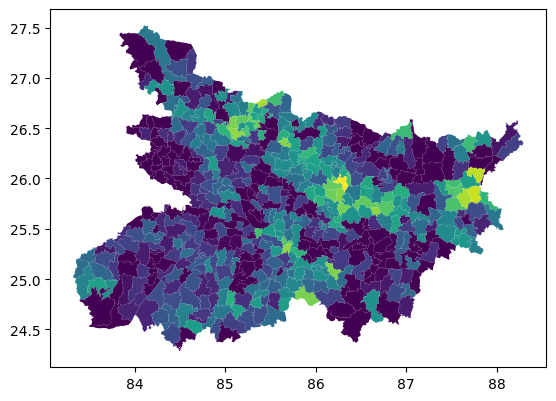

In [202]:
data_gdf.plot(column='SEV')

In [ ]:
risk_map = gpd.read_file('/content/drive/MyDrive/Bihar Project Work/Vul_data/Risk_Map/Risk_Score.shp')
# risk_map = gpd.read_file('/content/drive/MyDrive/Bihar Project Work/Vulnerability_Datasets/Risk_Score/Risk_Score.shp')
risk_map.head()

,CD Block_C,Name,Technical_,RF_Suscept,XGB_Suscep,RF_Flood_R,XGB_Flood_,RF_Flood_1,XGB_Floo_1,geometry
0,423,Simri,1.000000,0.593991,0.522549,0.593991,0.522549,0.668168,0.527656,"POLYGON ((84.13986 25.73172, 84.1406 25.73101,..."
1,424,Chakki,1.000000,0.574012,0.525299,0.574012,0.525299,0.645240,0.530438,"MULTIPOLYGON (((84.30144 25.65943, 84.30192 25..."
2,425,Barhampur,0.979141,0.428182,0.367483,0.419251,0.359818,0.467629,0.363046,"POLYGON ((84.38542 25.74655, 84.38593 25.74617..."
3,426,Chaugain,1.000000,0.127549,0.093331,0.127549,0.093331,0.132860,0.093482,"POLYGON ((84.2476 25.54629, 84.24757 25.54401,..."
4,427,Kesath,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,None


In [ ]:
risk_csv = gpd.read_file('/content/drive/MyDrive/Bihar Project Work/Vulnerability_Datasets/Final_Risk_Map/Proper_Risk_Map_Bihar/Proper_Risk_Map_bihar.shp')
risk_csv = risk_csv.drop(columns=['Technical_', 'RF_Suscept',
       'XGB_Suscep', 'RF_Flood_R', 'XGB_Flood_', 'RF_Flood_1', 'XGB_Floo_1',
       'Vulnera',])
risk_csv.head()

,CD_Block_C,Name,CD Block_C,geometry
0,361.0,Asthawan,NaN,"POLYGON ((85.68759 25.28839, 85.68831 25.2885,..."
1,377.0,Tharthari,NaN,"MULTIPOLYGON (((85.38996 25.24269, 85.39143 25..."
2,390.0,Patna Rural,NaN,"POLYGON ((85.10274 25.66161, 85.10504 25.65997..."
3,397.0,Masaurhi,NaN,"POLYGON ((85.01335 25.43786, 85.01374 25.43636..."
4,397.0,Daniawan,NaN,"POLYGON ((85.30535 25.48331, 85.30613 25.4828,..."


In [ ]:
# Drop the geometry column first from the risk_map
risk_map = risk_map.drop(columns=['geometry'])
risk_map

risk_map_updated = pd.merge(left=risk_csv, right=risk_map, on=['CD Block_C', 'Name'], how='left')

risk_map_updated

,CD_Block_C,Name,CD Block_C,geometry,Technical_,RF_Suscept,XGB_Suscep,RF_Flood_R,XGB_Flood_,RF_Flood_1,XGB_Floo_1
0,361.0,Asthawan,NaN,"POLYGON ((85.68759 25.28839, 85.68831 25.2885,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,377.0,Tharthari,NaN,"MULTIPOLYGON (((85.38996 25.24269, 85.39143 25...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,390.0,Patna Rural,NaN,"POLYGON ((85.10274 25.66161, 85.10504 25.65997...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,397.0,Masaurhi,NaN,"POLYGON ((85.01335 25.43786, 85.01374 25.43636...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,397.0,Daniawan,NaN,"POLYGON ((85.30535 25.48331, 85.30613 25.4828,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
537,NaN,Araria,104.0,"POLYGON ((87.4434 26.33975, 87.44702 26.33946,...",1.000000,0.849264,0.909537,0.849264,0.909537,0.961129,0.919113
538,NaN,Kursakatta,105.0,"MULTIPOLYGON (((87.46482 26.32703, 87.46381 26...",0.900895,0.831327,0.950142,0.748938,0.855978,0.845992,0.864936
539,NaN,Sikti,106.0,"POLYGON ((87.46907 26.43984, 87.47559 26.43843...",0.890162,0.778006,0.919177,0.692552,0.818217,0.781280,0.826738
540,NaN,Palasi,107.0,"POLYGON ((87.61043 26.34803, 87.61113 26.34819...",0.898525,0.889915,0.970844,0.799611,0.872327,0.904145,0.881474


In [ ]:
risk_map_updated

In [ ]:
# Identify numeric columns (excluding 'CD Block_C' and 'CD_Block_C' if they exist and are identifiers)
numeric_cols_updated = risk_map_updated.select_dtypes(include=np.number).columns.tolist()

# Exclude identifier columns if they are present in numeric_cols_updated
identifier_cols = ['CD Block_C', 'CD_Block_C']
for col in identifier_cols:
    if col in numeric_cols_updated:
        numeric_cols_updated.remove(col)

# Fill NaN values in numeric columns with the mean of each column
for col in numeric_cols_updated:
    risk_map_updated[col] = risk_map_updated[col].fillna(risk_map_updated[col].mean())

print(risk_map_updated.isnull().sum())
risk_map_updated.head()

In [ ]:
# risk_map_updated.to_file('/content/drive/MyDrive/Bihar Project Work/Vul_data/Risk_Map/Updated_Risk_Map.shp')